In [ ]:
!pip install tensorflow numpy pandas matplotlib seaborn scikit-learn opencv-python


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf
import cv2
import os
from sklearn.model_selection import train_test_split
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout


In [ ]:
from google.colab import drive
drive.mount('/content/drive')



Mounted at /content/drive


In [ ]:
!cp "/content/drive/My Drive/Train1.zip" /content/


In [ ]:
!unzip -q /content/Train1.zip -d /content/


In [ ]:
import os
os.listdir('/content/')


['.config', 'Train1.zip', 'drive', 'Train1', 'sample_data']

In [ ]:
import os
import cv2
import numpy as np
import glob
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder

IMG_SIZE = 32
TRAIN_DIR = "/content/Train1"

data = []
labels = []

categories = sorted(os.listdir(TRAIN_DIR))

def process_image(img_path):
    img = cv2.imread(img_path, cv2.IMREAD_COLOR)
    if img is None:
        return None

    img = cv2.resize(img, (IMG_SIZE, IMG_SIZE))

    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    equalized = cv2.equalizeHist(gray)

    blurred = cv2.GaussianBlur(equalized, (3, 3), 0)

    final_img = blurred.astype('float32') / 255.0
    return np.expand_dims(final_img, axis=-1)

for category in categories:
    class_path = os.path.join(TRAIN_DIR, category)
    img_paths = glob.glob(os.path.join(class_path, "*.png")) + \
                glob.glob(os.path.join(class_path, "*.jpg")) + \
                glob.glob(os.path.join(class_path, "*.jpeg"))

    for img_path in img_paths:
        processed_img = process_image(img_path)
        if processed_img is not None:
            data.append(processed_img)
            labels.append(category)

data = np.array(data, dtype='float32')

encoder = LabelEncoder()
labels = encoder.fit_transform(labels)
labels = np.array(labels)

# Split dataset (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(data, labels, test_size=0.2, random_state=42, stratify=labels)

print(f"Dataset Loaded: {len(data)} images")
print(f"Train Set: {X_train.shape}, Test Set: {X_test.shape}")


Dataset Loaded: 5429 images
Train Set: (4343, 32, 32, 1), Test Set: (1086, 32, 32, 1)


In [ ]:
NUM_CLASSES = len(set(y_train))
print(len(data), len(labels))
print(set(labels))
print("Number of classes:", NUM_CLASSES)



5429 5429
{np.int64(0), np.int64(1), np.int64(2), np.int64(3), np.int64(4), np.int64(5)}
Number of classes: 6


In [ ]:
print("Training Data Shape:", X_train.shape)
print("Training Labels Shape:", y_train.shape)
print("Testing Data Shape:", X_test.shape)
print("Testing Labels Shape:", y_test.shape)


Training Data Shape: (4343, 32, 32, 1)
Training Labels Shape: (4343,)
Testing Data Shape: (1086, 32, 32, 1)
Testing Labels Shape: (1086,)


In [ ]:
# Reshape data for CNN (Ensure proper format)
X_train = X_train.reshape(-1, IMG_SIZE, IMG_SIZE, 1)  # Add channel dimension
X_test = X_test.reshape(-1, IMG_SIZE, IMG_SIZE, 1)


In [ ]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.optimizers import Adam


In [ ]:
model = Sequential([
    Conv2D(32, (3,3), activation='relu', input_shape=(IMG_SIZE, IMG_SIZE, 1)),
    MaxPooling2D((2,2)),

    Conv2D(64, (3,3), activation='relu'),
    MaxPooling2D((2,2)),

    Conv2D(128, (3,3), activation='relu'),
    MaxPooling2D((2,2)),

    Flatten(),
    Dense(128, activation='relu'),
    Dropout(0.5),  # Prevent overfitting
    Dense(len(categories), activation='softmax')  # Output layer for classification
])

model.compile(optimizer=Adam(learning_rate=0.001),
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

model.summary()


/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 30, 30, 32)          │             320 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 15, 15, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 13, 13, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 6, 6, 64)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (None, 4, 4, 128)           │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_2 (MaxPooling2D)       │ (None, 2, 2, 128)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 512)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 128)                 │          65,664 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 6)                   │             774 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 159,110 (621.52 KB)

 Trainable params: 159,110 (621.52 KB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
# Train the model
history = model.fit(X_train, y_train, epochs=40, batch_size=32, validation_data=(X_test, y_test))


Epoch 1/40
136/136 ━━━━━━━━━━━━━━━━━━━━ 10s 59ms/step - accuracy: 0.5368 - loss: 1.2821 - val_accuracy: 0.9328 - val_loss: 0.2822
Epoch 2/40
136/136 ━━━━━━━━━━━━━━━━━━━━ 10s 57ms/step - accuracy: 0.9198 - loss: 0.2817 - val_accuracy: 0.9595 - val_loss: 0.1278
Epoch 3/40
136/136 ━━━━━━━━━━━━━━━━━━━━ 6s 41ms/step - accuracy: 0.9599 - loss: 0.1362 - val_accuracy: 0.9742 - val_loss: 0.0699
Epoch 4/40
136/136 ━━━━━━━━━━━━━━━━━━━━ 7s 55ms/step - accuracy: 0.9840 - loss: 0.0617 - val_accuracy: 0.9917 - val_loss: 0.0352
Epoch 5/40
136/136 ━━━━━━━━━━━━━━━━━━━━ 6s 41ms/step - accuracy: 0.9846 - loss: 0.0424 - val_accuracy: 0.9926 - val_loss: 0.0341
Epoch 6/40
136/136 ━━━━━━━━━━━━━━━━━━━━ 7s 52ms/step - accuracy: 0.9946 - loss: 0.0232 - val_accuracy: 0.9926 - val_loss: 0.0408
Epoch 7/40
136/136 ━━━━━━━━━━━━━━━━━━━━ 6s 45ms/step - accuracy: 0.9946 - loss: 0.0189 - val_accuracy: 0.9945 - val_loss: 0.0218
Epoch 8/40
136/136 ━━━━━━━━━━━━━━━━━━━━ 7s 48ms/step - accuracy: 0.9959 - loss: 0.0133 - val_ac

In [ ]:
test_loss, test_acc = model.evaluate(X_test, y_test)
print(f"Test Accuracy: {test_acc * 100:.2f}%")


34/34 ━━━━━━━━━━━━━━━━━━━━ 1s 26ms/step - accuracy: 0.9946 - loss: 0.0182
Test Accuracy: 99.54%


In [ ]:
model.save("image_detection_model.keras")


In [ ]:
from tensorflow.keras.models import load_model

model = load_model("/content/image_detection_model.keras")



In [ ]:
!ls


drive  image_detection_model.keras  sample_data  Train1  Train1.zip


In [ ]:
from google.colab import files

uploaded = files.upload()


Saving 00034_00000_00000.png to 00034_00000_00000.png


In [ ]:
import cv2
import numpy as np
from tensorflow.keras.models import load_model

model = load_model("/content/traffic_sign_model.keras")

image_path = "00001.png"
img = cv2.imread(image_path)

if img is None:
    print("Error: Image not loaded. Check filename.")
else:
    print("Image loaded successfully!")

    img = cv2.resize(img, (32, 32))

    img = img.astype("float32") / 255.0
    img = np.expand_dims(img, axis=0)

    prediction = model.predict(img)
    predicted_class = np.argmax(prediction)

    print(f"Predicted Class: {predicted_class}")


Image loaded successfully!
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 172ms/step
Predicted Class: 1


Image loaded successfully!
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 100ms/step


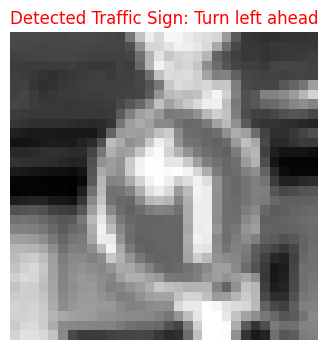

Predicted Class: Turn left ahead


In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.models import load_model

model = load_model("image_detection_model.keras")

image_path = "00034_00000_00000.png"
img = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)

if img is None:
    print("Error: Image not loaded. Check filename or path.")
else:
    print("Image loaded successfully!")

    img = cv2.resize(img, (32, 32))
    img = img.astype("float32") / 255.0
    img = np.expand_dims(img, axis=-1)
    img = np.expand_dims(img, axis=0)

    prediction = model.predict(img)
    predicted_class = np.argmax(prediction)

    # Class Labels
    classes = {
        0:'Speed limit (20km/h)', 1:'Speed limit (30km/h)', 2:'Stop',
        3:'No entry', 4:'Turn right ahead', 5:'Turn left ahead'
    }

    plt.figure(figsize=(4, 4))
    plt.imshow(img[0, :, :, 0], cmap="gray")
    plt.title(f"Detected Traffic Sign: {classes[predicted_class]}", fontsize=12, color="red")
    plt.axis("off")
    plt.show()

    print(f"Predicted Class: {classes[predicted_class]}")


In [ ]:
!pip install gradio


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 51.3/51.3 MB 10.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 322.2/322.2 kB 17.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 95.2/95.2 kB 5.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 11.3/11.3 MB 44.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 72.0/72.0 kB 1.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.3/62.3 kB 4.7 MB/s eta 0:00:00


In [ ]:
import cv2
import numpy as np
import gradio as gr
from tensorflow.keras.models import load_model

model = load_model("image_detection_model.keras")

# Class Labels
classes = {
    0:'Speed limit (20km/h)', 1:'Speed limit (30km/h)', 2:'Stop',
    3:'No entry', 4:'Turn right ahead', 5:'Turn left ahead'

}

def predict_image(image):

    img = cv2.cvtColor(image, cv2.COLOR_RGB2GRAY)

    img = cv2.resize(img, (32, 32))
    img = img.astype("float32") / 255.0
    img = np.expand_dims(img, axis=-1)
    img = np.expand_dims(img, axis=0)

    prediction = model.predict(img)
    predicted_class = np.argmax(prediction)
    return f"Detected Traffic Sign: {classes[predicted_class]}"

iface = gr.Interface(fn=predict_image, inputs=gr.Image(), outputs="text")
iface.launch()


Running Gradio in a Colab notebook requires sharing enabled. Automatically setting `share=True` (you can turn this off by setting `share=False` in `launch()` explicitly).

Colab notebook detected. To show errors in colab notebook, set debug=True in launch()
* Running on public URL: https://3b06fb0e64fec9e680.gradio.live

This share link expires in 72 hours. For free permanent hosting and GPU upgrades, run `gradio deploy` from the terminal in the working directory to deploy to Hugging Face Spaces (https://huggingface.co/spaces)
